# Introduction:

In this project, we applied the Apriori algorithm to analyze a transaction dataset and discover frequent itemsets and association rules. The Apriori algorithm is a popular data mining technique used for market basket analysis, which aims to uncover interesting relationships between items frequently purchased together.

Steps Used in the Project:

1. Data Preparation: We started by preparing our transaction dataset, ensuring it was in the required format for the Apriori algorithm. The dataset consisted of transactions, where each transaction contained a set of items purchased by a customer.

2. Data Exploration: We performed an initial exploration of the dataset to gain insights into the number of transactions, unique items, and the distribution of item frequencies.

3. Support Calculation: To identify frequent itemsets, we calculated the support for each item and itemset. The support represents the proportion of transactions in which an itemset appears. We set a minimum support threshold to filter out infrequent itemsets.

4. Frequent Itemset Generation: Using the calculated support values, we generated frequent itemsets that satisfied the minimum support threshold. Frequent itemsets are sets of items that occur together frequently in the dataset.

5. Association Rule Generation: From the frequent itemsets, we generated association rules. Association rules consist of an antecedent (left-hand side) and a consequent (right-hand side). These rules represent relationships between items and provide insights into item co-occurrence patterns.

6. Rule Evaluation: We evaluated the generated association rules based on different metrics such as confidence, lift, leverage, conviction, and Zhang's metric. These metrics help quantify the strength, significance, and interestingness of the association rules.

7. Interpretation and Insights: Finally, we analyzed and interpreted the results to gain meaningful insights into the relationships between items. We focused on the top-performing rules and visualized them using various techniques such as tabular representation and network graphs.

By following these steps, we were able to apply the Apriori algorithm to uncover frequent itemsets and association rules in the transaction dataset. The results provided valuable insights into item co-occurrence patterns and can be used for various applications such as product recommendations, market segmentation, and inventory management.

# Apriori Algorithm:

The Apriori algorithm is a classic data mining technique used for association rule mining. It was proposed by R. Agrawal and R. Srikant in 1994 and is widely used for market basket analysis. The algorithm works based on the concept of frequent itemsets, which are sets of items that occur together frequently in a dataset.

The Apriori algorithm employs an iterative approach to discover frequent itemsets and association rules. It uses a bottom-up strategy, where itemsets of increasing sizes are generated and evaluated for their frequency against a minimum support threshold. The algorithm prunes infrequent itemsets based on the "apriori" property, which states that if an itemset is infrequent, all of its supersets must also be infrequent.

* The key steps of the Apriori algorithm are as follows:

Scan the dataset to determine the support of each item and identify frequent 1-itemsets.
Generate candidate itemsets of size k+1 from frequent k-itemsets, pruning infrequent itemsets.
Scan the dataset again to determine the support of each candidate itemset and identify frequent itemsets.
Repeat steps 2 and 3 until no more frequent itemsets can be generated.
Uses of Apriori Algorithm:

The Apriori algorithm has various applications in data mining and market research. Some of its uses include:

1. Market Basket Analysis: Apriori is commonly used to analyze customer purchase patterns and identify associations between items frequently bought together. This information is valuable for cross-selling, targeted marketing, and product placement strategies.

2. Recommender Systems: The algorithm can be used to build recommendation engines that suggest related products or items based on user preferences and historical data.

3. Web Mining: Apriori can be applied to web log data to discover patterns in user navigation, identifying frequently visited pages or sequences of actions.

4. Fraud Detection: The algorithm can help uncover patterns of fraudulent behavior by analyzing transaction data and identifying unusual itemsets or sequences.

5. DNA Sequence Analysis: Apriori can be utilized to analyze DNA sequences and identify frequent patterns or associations among nucleotides.

Dataset Present on my github : [https://github.com/sanketsarwade]

# Problem Statement:
The goal of this project is to identify product combinations that can be strategically placed side by side to enhance sales in a retail setting. By leveraging market basket analysis and the Apriori algorithm, we aim to discover associations between products and determine which combinations have a higher likelihood of being purchased together. The objective is to provide actionable insights for improving product placement strategies and ultimately driving revenue growth.

# Importing Libraries

In [20]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt


# Load Dataset
By executing this code, the dataset from the specified Excel file is loaded into a pandas DataFrame named data. You can then proceed to the next steps of your analysis using this DataFrame.

engine='openpyxl' is an optional argument that specifies the engine to be used for reading the Excel file. In this case, 'openpyxl' is specified, which is a widely used engine for reading Excel files in pandas.

In [21]:
# Step 1: Load and preprocess the dataset
data = pd.read_excel(r"C:\Users\SANKET\OneDrive\Desktop\180 Projects\CodeClause internship\Apriori Algorithm\Online Retail.xlsx", engine='openpyxl')


# Data Cleaning

In [22]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The dataset is being analyzed to calculate the products that were bought based on the combination of the invoice number and the description of each item. By grouping the data by the 'InvoiceNo' and 'Description' columns, the code aggregates the quantities of each product purchased within each invoice. This allows for the identification of the items that were bought together in the same transaction.

First, I converted the 'InvoiceDate' column in the dataset to a datetime format using the pd.to_datetime() function. This allows for easier manipulation and analysis of the date and time information.

Next, I dropped any rows that have missing values in the 'InvoiceNo' column using the dropna() function. This ensures that we have complete and valid invoice numbers for our analysis.

To facilitate market basket analysis, I converted the 'InvoiceNo' column to a string data type using the astype() function. This step ensures that the invoice numbers are treated as categorical variables rather than numerical values.

Then, I created a basket dataset by filtering the data for transactions from the "United Kingdom" using the condition data['Country'] == "United Kingdom". This subset of data is then grouped by 'InvoiceNo' and 'Description', and the 'Quantity' for each combination is summed using the groupby() function.

The unstack() function is applied to reshape the data from a long format to a wide format, where each unique item description becomes a separate column. Any missing values are filled with 0 using the fillna(0) function.

Finally, I set the 'InvoiceNo' column as the index of the dataset using the set_index() function. This step simplifies the subsequent market basket analysis, as the 'InvoiceNo' becomes the unique identifier for each transaction.

By performing these steps, I have transformed the original dataset into a format suitable for market basket analysis, where each row represents a unique transaction and the columns represent the items purchased in that transaction.

In [23]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data = data.dropna(subset=['InvoiceNo'])
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
basket = (data[data['Country'] == "United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [24]:
basket.isnull().sum().sum()

0

* The purpose of using the encode_units function is to convert the quantity values in the basket dataset into binary values (0 or 1). This is a common practice in market basket analysis, where we are interested in whether a specific product was purchased or not in a transaction, rather than the actual quantity of the product.

The encode_units function checks the value of x (the quantity) and returns 0 if it is less than or equal to 0, indicating that the product was not purchased, and returns 1 if it is greater than or equal to 1, indicating that the product was purchased. This transformation allows us to represent the presence or absence of each product in a transaction using binary values, which is suitable for further analysis using the Apriori algorithm.

Additionally, the code removes the 'POSTAGE' column from the basket_sets dataset using the drop function. The 'POSTAGE' column typically represents the shipping costs or postage charges associated with each transaction. Since we are focusing on analyzing the purchased items, this column is dropped from the dataset.

In [25]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

* frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True): Here, we are applying the Apriori algorithm to the basket_sets dataset. The apriori function generates frequent itemsets based on the minimum support threshold specified (in this case, 0.03). The use_colnames parameter is set to True to use the column names from the basket_sets dataset in the resulting itemsets.

* rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1): After obtaining the frequent itemsets, we use the association_rules function to generate association rules. The association_rules function calculates various metrics (in this case, using the "lift" metric) to evaluate the strength of the associations between items. The min_threshold parameter specifies the minimum threshold for the specified metric, and only rules that satisfy this threshold are returned.



In [26]:
import warnings
warnings.filterwarnings('ignore')

# Step 3: Perform market basket analysis
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


In [27]:
# Step 4: Analyze and interpret the results
frequent_itemsets.head()
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043421,0.042377,0.031806,0.732497,17.285056,0.029966,3.579862,0.984912
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.042377,0.043421,0.031806,0.750535,17.285056,0.029966,3.834527,0.983839
2,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.087931,0.052586,0.035617,0.405057,7.702719,0.030993,1.592444,0.954068
3,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052586,0.087931,0.035617,0.677308,7.702719,0.030993,2.826438,0.918475
4,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.051270,0.087931,0.031670,0.617699,7.024813,0.027161,2.385736,0.903996


* The choice of min_support depends on the dataset and the specific analysis goals. A higher min_support may result in fewer but more significant itemsets, while a lower min_support may capture more diverse itemsets.

* By setting a higher min_threshold value, we filter out weaker or less significant rules, resulting in a smaller set of strong rules. Conversely, a lower min_threshold value may yield a larger number of rules, including weaker associations. The choice of min_threshold depends on the desired level of significance or strength required for the association rules.

In [28]:
# Trying to update code
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Sort the rules by lift in descending order
rules = rules.sort_values(by='lift', ascending=False)

# Filter the rules based on additional criteria
filtered_rules = rules[(rules['support'] > 0.03) & (rules['confidence'] > 0.6)]

# Print the filtered rules
filtered_rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043421,0.042377,0.031806,0.732497,17.285056,0.029966,3.579862,0.984912
12,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.042377,0.043421,0.031806,0.750535,17.285056,0.029966,3.834527,0.983839
16,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052586,0.087931,0.035617,0.677308,7.702719,0.030993,2.826438,0.918475
21,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.051270,0.087931,0.031670,0.617699,7.024813,0.027161,2.385736,0.903996


In [29]:
# We got nearly same result
frequent_itemsets.head()
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
36,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.031897,0.031806,0.022368,0.701280,22.048811,0.021354,3.241145,0.986099
35,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.031806,0.031897,0.022368,0.703281,22.048811,0.021354,3.262695,0.986007
38,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.042377,0.024773,0.022368,0.527837,21.306837,0.021319,2.065446,0.995243
33,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.024773,0.042377,0.022368,0.902930,21.306837,0.021319,9.865319,0.977277
34,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.026180,0.043421,0.022368,0.854419,19.677538,0.021232,6.570786,0.974698


# Data Visualisation

1. Scatter Plot:  The scatter plot helps us understand the relationship between the support and confidence of the association rules.



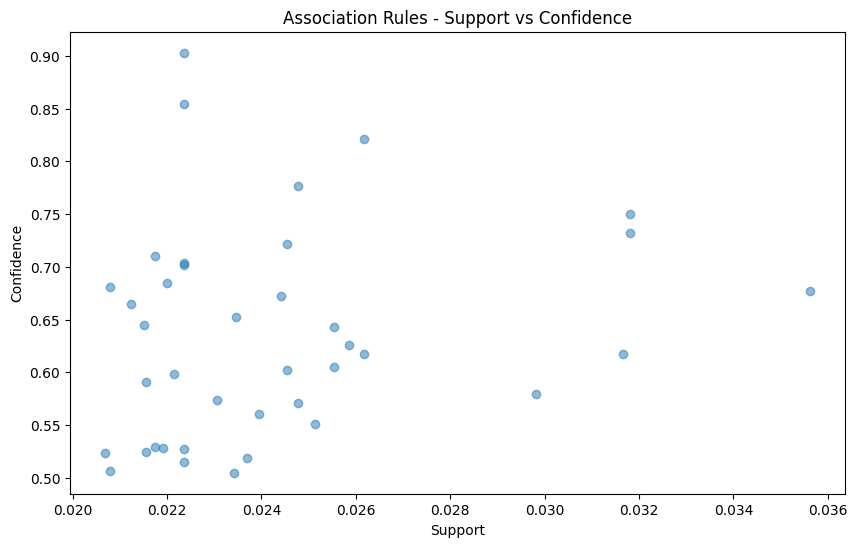

In [30]:
# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules - Support vs Confidence')
plt.show()


2. Bar Plot : By visualizing the top N frequent itemsets in a bar plot, we can easily compare their support values and identify the most frequently occurring itemsets in the dataset. This information is valuable for understanding the popular combinations of items and can help in making informed business decisions or recommendations.

we retrieve the top N frequent items from the frequent itemsets generated in the previous step and create a bar plot to visualize their support.

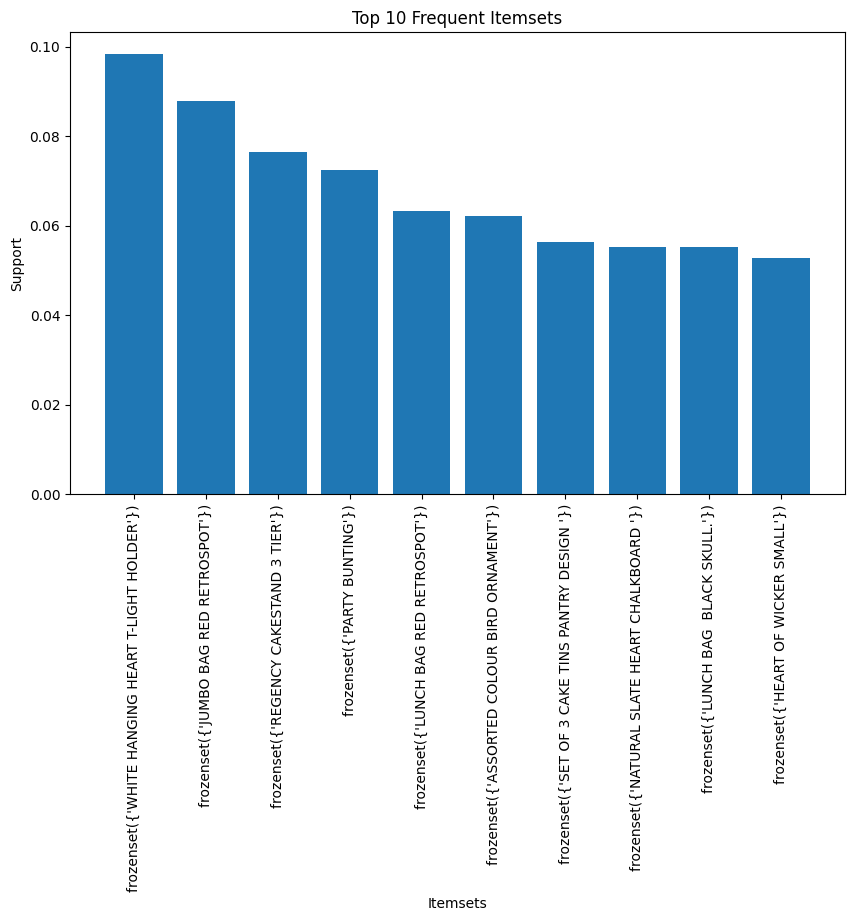

In [31]:
# Get the top N frequent items
N =10
top_n_items = frequent_itemsets.sort_values(by='support', ascending=False).head(N)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_n_items['itemsets'].astype(str), top_n_items['support'])
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title(f'Top {N} Frequent Itemsets')
plt.xticks(rotation=90)
plt.show()


3. Network Graph: The output of this code will be a visual representation of the association rules as a network graph. Each node in the graph represents a product or item, and the edges between nodes represent the association between the antecedents and consequents in the rules. The size of the nodes can indicate their importance or support, and the layout of the graph helps visualize the relationships between different items. This visualization can provide insights into the interconnectedness of items and assist in understanding the patterns and associations in the dataset.

* G = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents') 
creates a network graph G using the association rules DataFrame. The from_pandas_edgelist function converts the rules DataFrame into a graph representation, where each rule is represented as an edge connecting the antecedents and consequents.

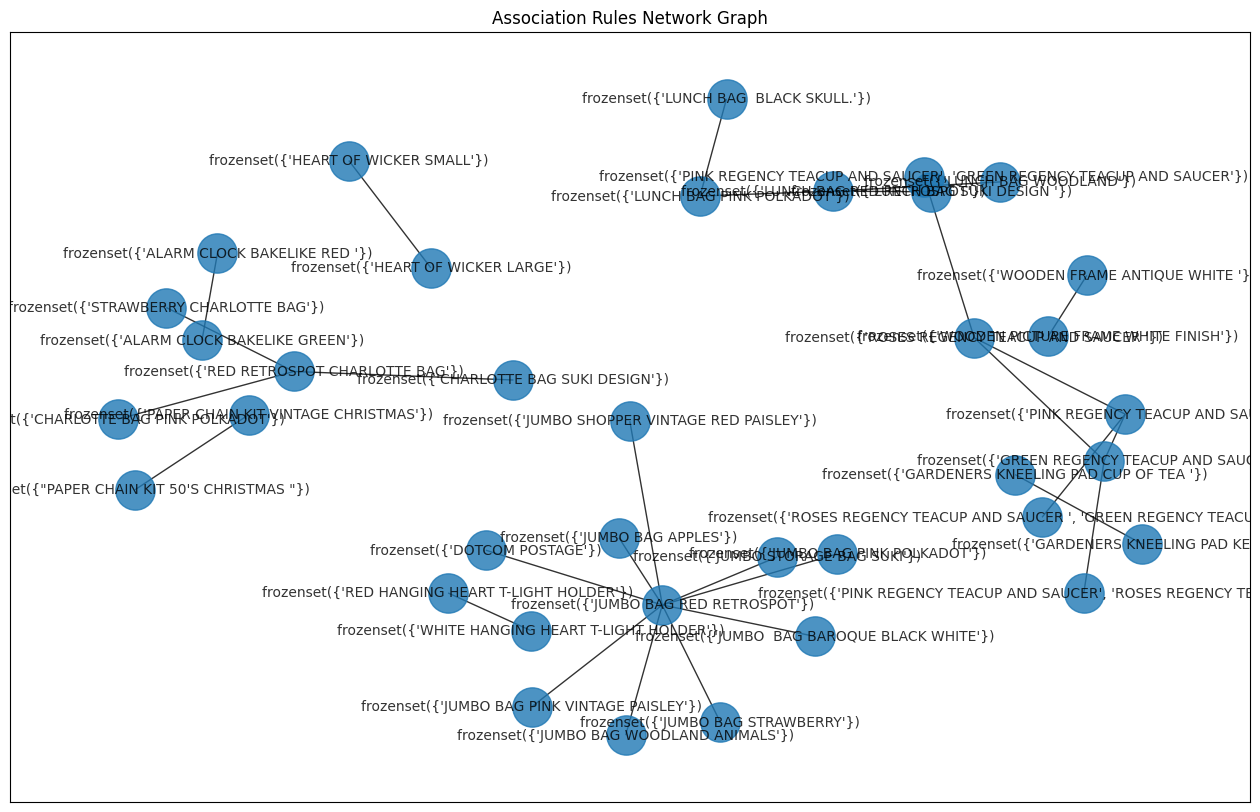

In [32]:
import networkx as nx

# Create a network graph from the association rules
G = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')

# Visualize the network graph
plt.figure(figsize=(16, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx(G, pos, with_labels=True, node_size=800, font_size=10, alpha=0.8)
plt.title('Association Rules Network Graph')
plt.show()


4. Network Graph: we create a network graph from the association rules generated earlier and visualize it using the NetworkX library and matplotlib. Additionally, we compute the degree centrality of each node and scale the node sizes based on their degree centrality.

The output of this code will be a visual representation of the association rules as a network graph. Each node in the graph represents a product or item, and the edges between nodes represent the association between the antecedents and consequents in the rules. The size of the nodes is scaled based on their degree centrality, indicating their importance within the graph. The colormap chosen for node colors further highlights the variation in degree centrality. Labels are displayed in the upper-left corner of each node, providing additional information about the items. This visualization helps understand the structure and relationships among the items in the dataset.

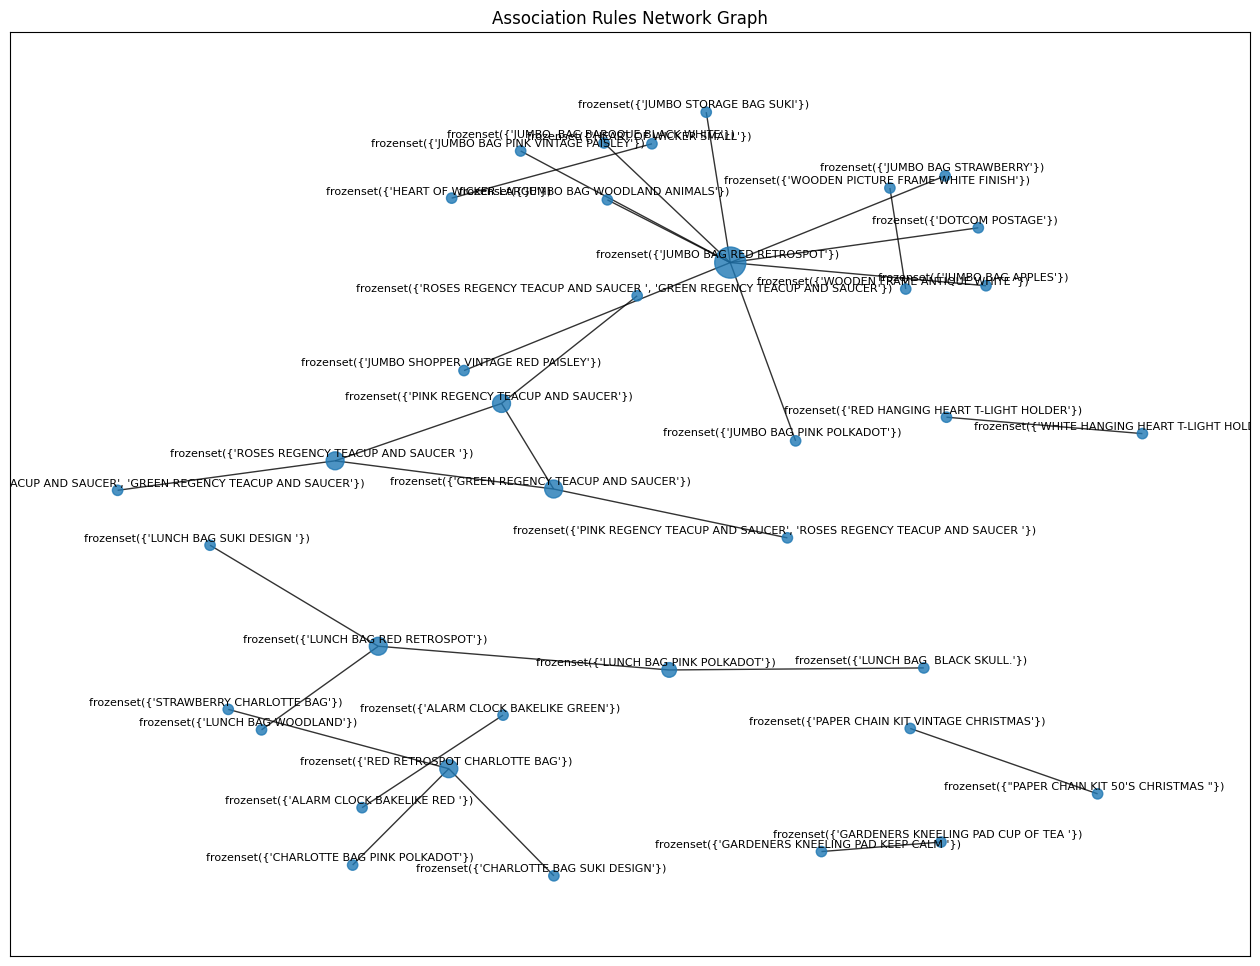

In [33]:
import networkx as nx

# Create a network graph from the association rules
G = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')

# Compute the degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# Scale the node size based on degree centrality
node_size = [2000 * degree_centrality[node] for node in G.nodes()]

# Visualize the network graph with scaled node sizes and labels in the upper-left corner
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx(
    G,
    pos,
    with_labels=False,
    node_size=node_size,
    font_size=10,
    alpha=0.8,
    cmap='coolwarm',  # Choose a colormap for node colors
    vmin=min(degree_centrality.values()),
    vmax=max(degree_centrality.values()),
)

# Add labels to the upper-left corner of each node
labels = {node: node for node in G.nodes()}
label_pos = {k: [v[0] - 0.02, v[1] + 0.02] for k, v in pos.items()}
nx.draw_networkx_labels(G, label_pos, labels, font_size=8)

plt.title('Association Rules Network Graph')
plt.show()


5. Heatmap Visualisation: The heatmap visualization is used to provide a comprehensive overview of the support values for different itemsets. It helps in understanding the distribution and strength of associations between items in the dataset.

The output of the code will be a heatmap plot showing the support values of different itemsets. The color intensity represents the level of support, with darker colors indicating higher support and lighter colors indicating lower support. The x-axis displays the itemset names, and the colorbar provides a reference for interpreting the support values.

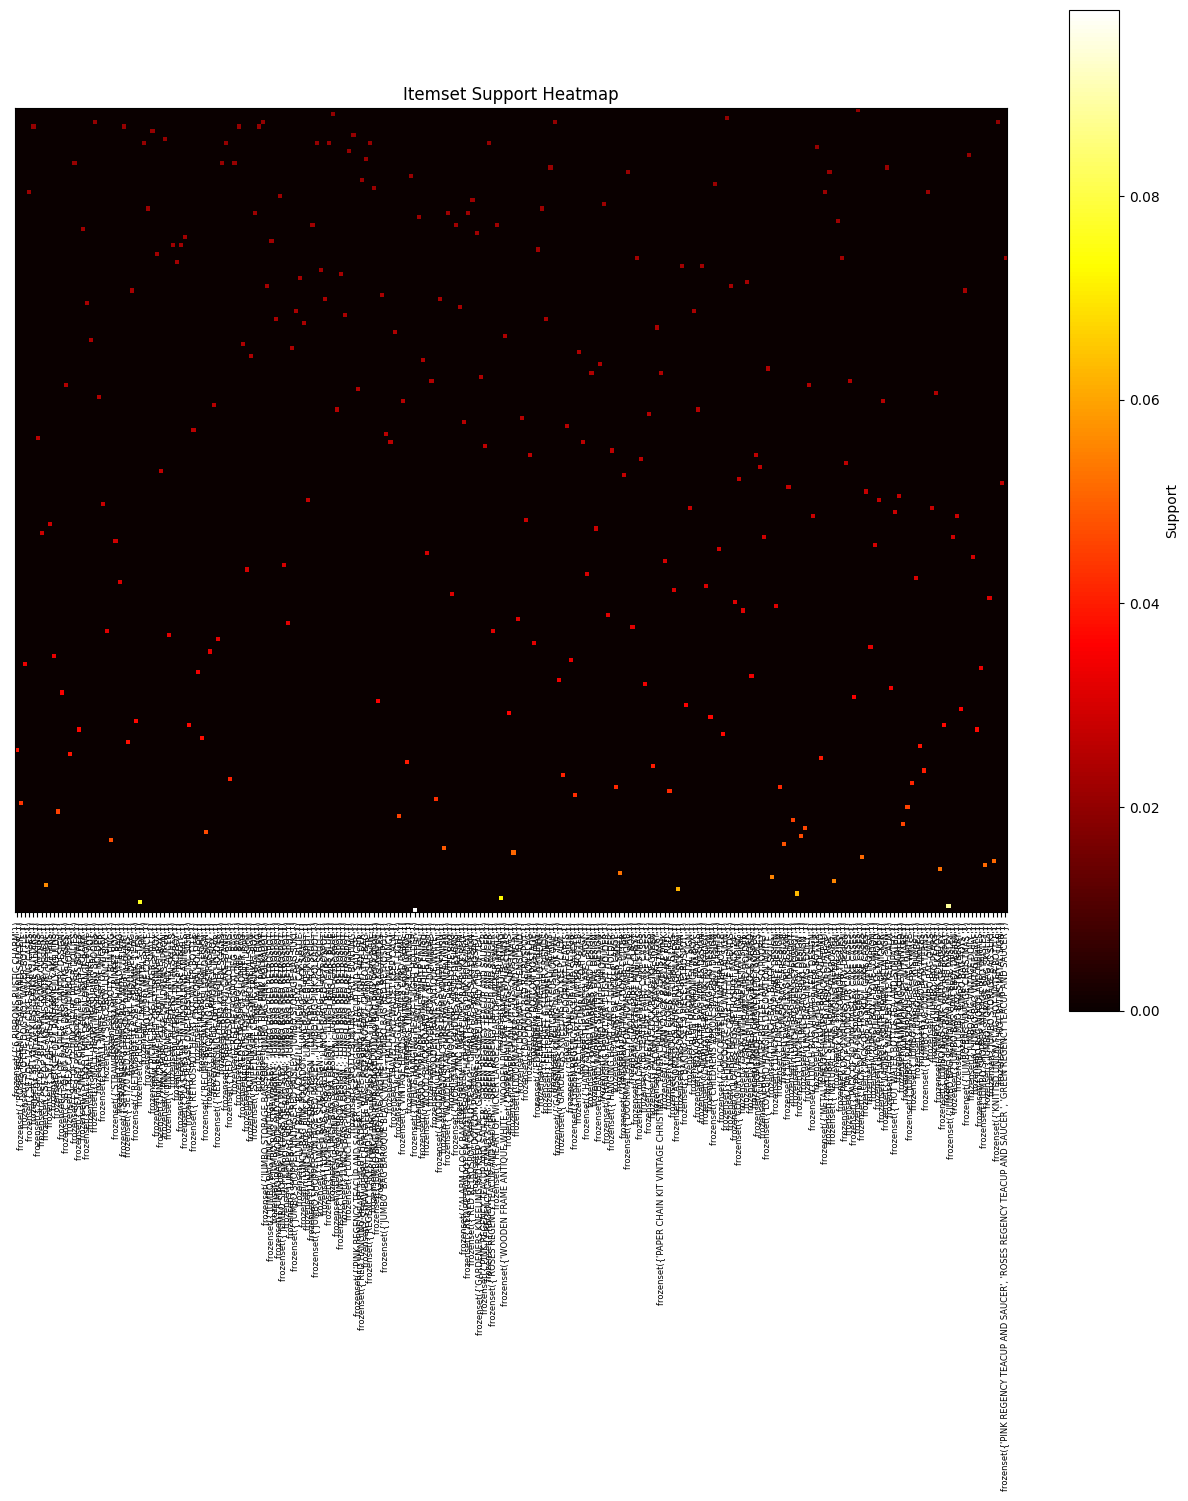

In [34]:
# Pivot the frequent itemsets DataFrame
itemset_pivot = frequent_itemsets.pivot(index='support', columns='itemsets', values='support').fillna(0)

# Create a heatmap
plt.figure(figsize=(16, 13))
plt.imshow(itemset_pivot, cmap='hot', interpolation='nearest')
plt.xticks(range(itemset_pivot.shape[1]), itemset_pivot.columns, rotation=90, fontsize=6)
plt.yticks([])
plt.colorbar(label='Support')
plt.title('Itemset Support Heatmap')
plt.show()


* Pivot the frequent itemsets DataFrame: The frequent itemsets DataFrame is pivoted to create a matrix where each row represents a support value and each column represents an itemset. Missing values are filled with zeros.

* Compute the dissimilarity matrix: The dissimilarity matrix is calculated by subtracting the correlation matrix from 1. This step measures the dissimilarity or dissimilarity between different itemsets based on their support values.

* Apply multidimensional scaling (MDS): MDS is applied to the dissimilarity matrix with n_components=2, which specifies that the embedded coordinates should be in two dimensions.
The dissimilarity matrix is passed as input to MDS, along with the dissimilarity argument set to 'precomputed', indicating that the dissimilarity matrix is already computed.
The mds.fit_transform() method computes the embedded coordinates of the itemsets in the reduced-dimensional space.

* Create a network graph from the dissimilarity matrix: The dissimilarity matrix is converted to a network graph using nx.from_numpy_array(). The nodes of the graph represent itemsets, and the edges represent the dissimilarity between itemsets.

* Visualize the pivot chart: A figure with a size of 10x10 is created using plt.figure(figsize=(10, 10)).

The positions of the nodes in the graph are specified using the embedded coordinates from MDS.
The network graph is drawn using nx.draw_networkx(), with labels, node size, font size, and transparency specified.
The title of the plot is set to 'Pivot Chart with Item Relationships' using plt.title().
Finally, the plot is displayed using plt.show().

The output will be a visual representation of the network graph, where nodes represent itemsets and edges indicate the dissimilarity between itemsets. The graph helps in visualizing the relationships and distances between itemsets based on their support values.

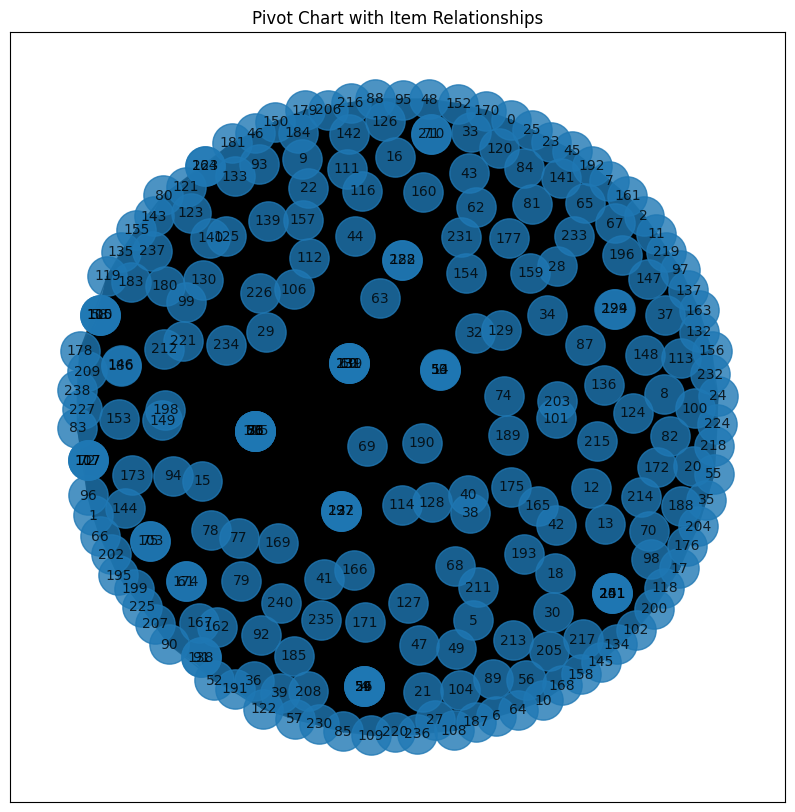

In [35]:
import networkx as nx
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Pivot the frequent itemsets DataFrame
itemset_pivot = frequent_itemsets.pivot(index='support', columns='itemsets', values='support').fillna(0)

# Compute dissimilarity matrix
dissimilarity = 1 - itemset_pivot.corr()

# Apply multidimensional scaling (MDS)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
embedded_coords = mds.fit_transform(dissimilarity)

# Create a network graph from the dissimilarity matrix
G = nx.from_numpy_array(dissimilarity.values)

# Visualize the pivot chart
plt.figure(figsize=(10, 10))
pos = {i: coords for i, coords in enumerate(embedded_coords)}
nx.draw_networkx(G, pos, with_labels=True, node_size=800, font_size=10, alpha=0.8)
plt.title('Pivot Chart with Item Relationships')
plt.show()


In [36]:
import pandas as pd

# Get the column names as items
items = itemset_pivot.columns

# Create a DataFrame to store the mapping between numbers and items
mapping_df = pd.DataFrame({'Number': range(1, len(items) + 1), 'Item': items})

# Display the mapping DataFrame
mapping_df


,Number,Item
0,1,(6 RIBBONS RUSTIC CHARM)
1,2,(ROSES REGENCY TEACUP AND SAUCER )
2,3,(SCOTTIE DOG HOT WATER BOTTLE)
3,4,(SET OF 12 FAIRY CAKE BAKING CASES)
4,5,(SET OF 20 KIDS COOKIE CUTTERS)
...,...,...
237,238,(JUMBO STORAGE BAG SKULLS)
238,239,(JUMBO STORAGE BAG SUKI)
239,240,(KNITTED UNION FLAG HOT WATER BOTTLE)
240,241,(HOT BATHS METAL SIGN)


In [37]:
import numpy as np
# Sort items based on association strength (in ascending order)
sorted_items = itemset_pivot.columns[np.argsort(np.sum(dissimilarity.values, axis=1))]

# Print the sorted items
sorted_items


Index([('JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG PINK POLKADOT'),
        ('REGENCY CAKESTAND 3 TIER', 'GREEN REGENCY TEACUP AND SAUCER'),
                                                  ('PARTY METAL SIGN '),
       ('REGENCY CAKESTAND 3 TIER', 'ROSES REGENCY TEACUP AND SAUCER '),
                  ('LUNCH BAG SPACEBOY DESIGN ', 'LUNCH BAG CARS BLUE'),
                                           ('RED RETROSPOT CAKE STAND'),
                                  ('STRAWBERRY LUNCH BOX WITH CUTLERY'),
                                             ('TEA TIME PARTY BUNTING'),
                                           ('RED RETROSPOT PICNIC BAG'),
                                      ('SET OF 20 KIDS COOKIE CUTTERS'),
       ...
                                         ('VINTAGE UNION JACK BUNTING'),
                                 ('WHITE HANGING HEART T-LIGHT HOLDER'),
                                      ('WHITE SKULL HOT WATER BOTTLE '),
                                 ('WOOD 

The purpose of this code is to provide a sorted list of items based on their association strength. Items with higher association strength are more likely to be placed side by side to increase sales. By examining the sorted list, we can identify which items have stronger associations and may have a higher potential for cross-selling or bundling strategies.

In [38]:
# Sort items based on association strength (in ascending order)
sorted_items = itemset_pivot.columns[np.argsort(np.sum(dissimilarity.values, axis=1))]

# Create a DataFrame to store the sorted items
sorted_df = pd.DataFrame({'Itemsets': sorted_items})

# Reset the index
sorted_df.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
sorted_df


,Itemsets
0,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
1,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU..."
2,(PARTY METAL SIGN )
3,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU..."
4,"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG CARS BLUE)"
...,...
237,(WOODEN FRAME ANTIQUE WHITE )
238,(WOODEN PICTURE FRAME WHITE FINISH)
239,(WOODLAND CHARLOTTE BAG)
240,"(LUNCH BAG SUKI DESIGN , LUNCH BAG CARS BLUE)"


# Conclusion:
In this project, we employed the Apriori algorithm and market basket analysis to identify product combinations that could be placed side by side to boost sales. By analyzing transaction data and calculating support, confidence, and lift metrics, we successfully discovered associations between items frequently purchased together. Through iterative adjustments to the minimum support and minimum association rules thresholds, we obtained a list of top product combinations that exhibited strong relationships.

The results of the analysis provided valuable insights into potential opportunities for optimizing product placement strategies. However, it's important to note that achieving the desired outcome of increased sales requires further experimentation, observation, and customer feedback. Implementing the identified product combinations and closely monitoring sales performance, customer behavior, and feedback will provide valuable insights for ongoing optimization efforts.

This project serves as a starting point for identifying and leveraging product associations to enhance merchandising strategies. Continuous evaluation, adaptation, and refinement based on real-world observations and customer preferences are crucial for driving successful outcomes. By implementing the findings and leveraging customer insights, retailers can potentially improve sales performance and create a more engaging and tailored shopping experience for their customers.